# Customer Personality Analysis


##### People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

##### Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

##### Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

##### Place
* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month

In [1]:
#import relevant libraries 
library(tidyverse)
library(ggplot2)
library(dplyr)
library(corrplot)
library(reshape)
library(factoextra)
library(GGally)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5     v purrr   0.3.2
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
corrplot 0.92 loaded
Warning message:
"package 'reshape' was built under R version 3.6.3"
Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

The following objects are masked from 'package:tidyr':

    expand, smiths

Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WB

In [2]:
#get data 
df <- read.csv('C:/Users/sbak0/Downloads/marketing_campaign.csv', sep='\t')

In [3]:
head(df)

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0


In [4]:
glimpse(df)

Rows: 2,240
Columns: 29
$ ID                  <int> 5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 485~
$ Year_Birth          <int> 1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 19~
$ Education           <fct> Graduation, Graduation, Graduation, Graduation, Ph~
$ Marital_Status      <fct> Single, Single, Together, Together, Married, Toget~
$ Income              <int> 58138, 46344, 71613, 26646, 58293, 62513, 55635, 3~
$ Kidhome             <int> 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,~
$ Teenhome            <int> 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,~
$ Dt_Customer         <fct> 04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19~
$ Recency             <int> 58, 38, 26, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82~
$ MntWines            <int> 635, 11, 426, 11, 173, 520, 235, 76, 14, 28, 5, 6,~
$ MntFruits           <int> 88, 1, 49, 4, 43, 42, 65, 10, 0, 0, 5, 16, 61, 2, ~
$ MntMeatProducts     <int> 546, 6, 127, 20, 118, 98, 164, 56, 24, 6, 6, 11, 4~
$ MntFishProduct

In [5]:
#missing data
sum(is.na(df))

[1] 24

In [6]:
#drop na 
df1 <- na.omit(df)

In [7]:
#Total_spent 
df1$Total_spent <- df1$MntFishProducts + df1$MntFruits + df1$MntGoldProds +
                   df1$MntMeatProducts + df1$MntSweetProducts + df1$MntWines

ERROR: Error in boxplot(df1$Total_spent, main = "Total Spent by Customers", xlab = "Total", : non-numeric argument to binary operator


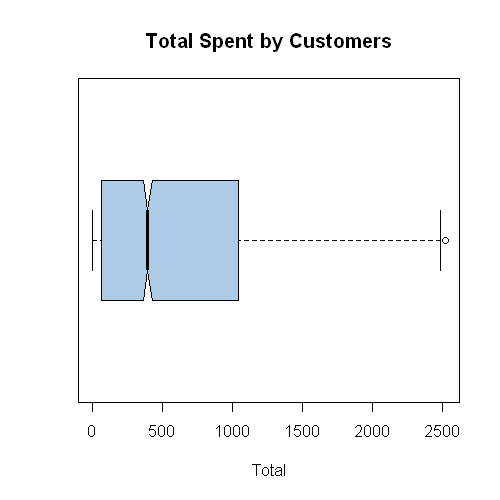

In [8]:
boxplot(df1$Total_spent, main='Total Spent by Customers', 
       xlab='Total', col = '#adcae6', horizontal=TRUE, notch=TRUE)+
    options(repr.plot.width=5, repr.plot.height=5, repr.plot.res=100)

## Understand the Customer

### Age

In [9]:
#Age 
df1$Age <- 2022 - df1$Year_Birth

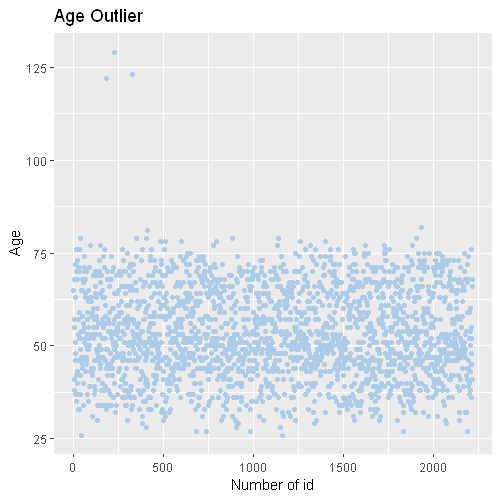

In [10]:
#Check Age outliers to see if there is any weird data
ggplot(df1, aes(1:length(ID), Age))+
    geom_point(color='#adcae6')+
    labs(x='Number of id', y='Age', title='Age Outlier')

There are three outliers in the Age data and those are above the age of 100 and close to 125. Since, its very unlikey to be truw those three outliers will be dropped.

In [11]:
#Three outliers are drop as it is unlikely for someone to be aove 110 
df1 <- df1[!(df1$Age > 100), ]

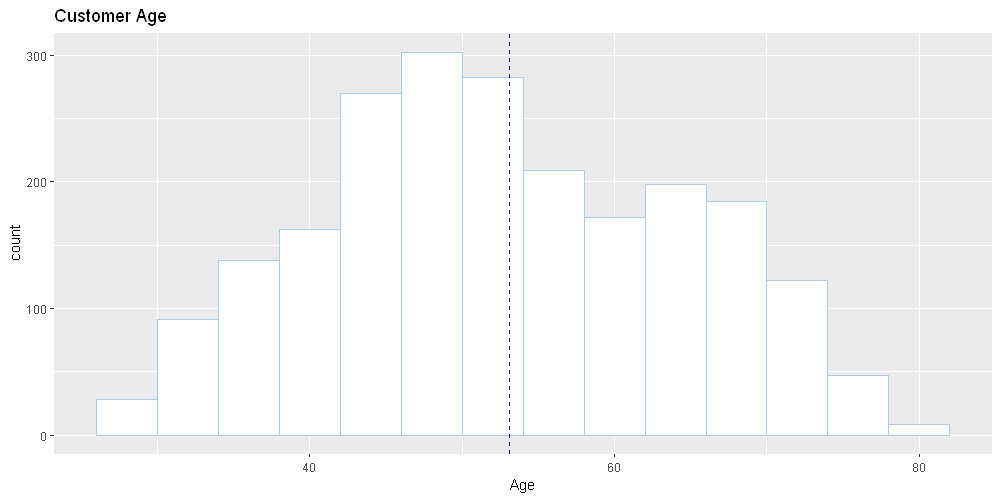

In [13]:
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res=100)

#Customer Age distribution 
ggplot(df1)+
    geom_histogram(mapping=aes(Age), binwidth=4, fill='white', color='#adcae6')+
    geom_vline(aes(xintercept=mean(Age)), linetype='dashed', color='blue')+
    ggtitle('Customer Age')

### Marital Status

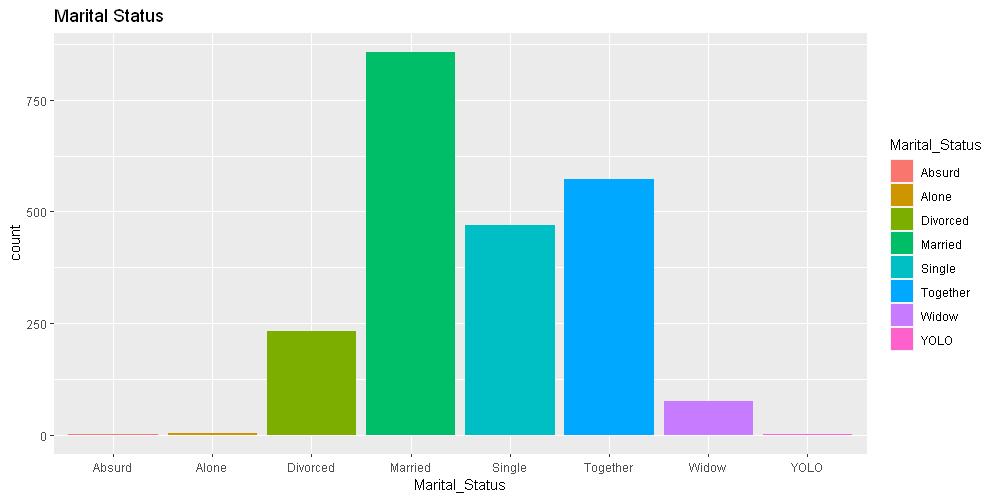

In [14]:
#Marital_Status 
ggplot(df1, aes(x=Marital_Status,fill=Marital_Status))+
    geom_bar()+
    ggtitle('Marital Status')

In [15]:
#clean Martial_Status
df1$Marital_Status[df1$Marital_Status == 'Absurd'] = 'Single'
df1$Marital_Status[df1$Marital_Status == 'Alone'] = 'Single'
df1$Marital_Status[df1$Marital_Status == 'Divorced'] = 'Single'
df1$Marital_Status[df1$Marital_Status == 'Together'] = 'Married'
df1$Marital_Status[df1$Marital_Status == 'Widow'] = 'Single'
df1$Marital_Status[df1$Marital_Status == 'YOLO'] = 'Single'

unique(df1$Marital_Status)

[1] Single  Married
Levels: Absurd Alone Divorced Married Single Together Widow YOLO

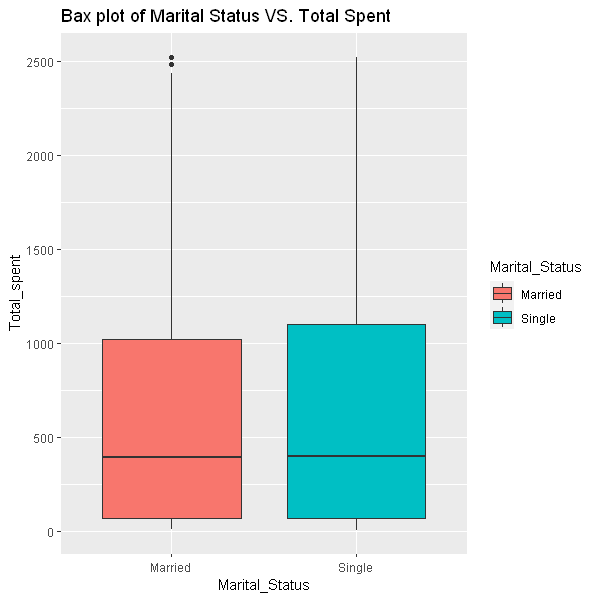

In [16]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=100)

ggplot(df1, aes(x=Marital_Status, y=Total_spent, fill=Marital_Status))+
    geom_boxplot()+
    ggtitle('Bax plot of Marital Status VS. Total Spent')

### Kids

In [17]:
#Total_kids 
df1$Total_kid <- df1$Kidhome + df1$Teenhome
df1$Total_kid <- factor(df1$Total_kid)

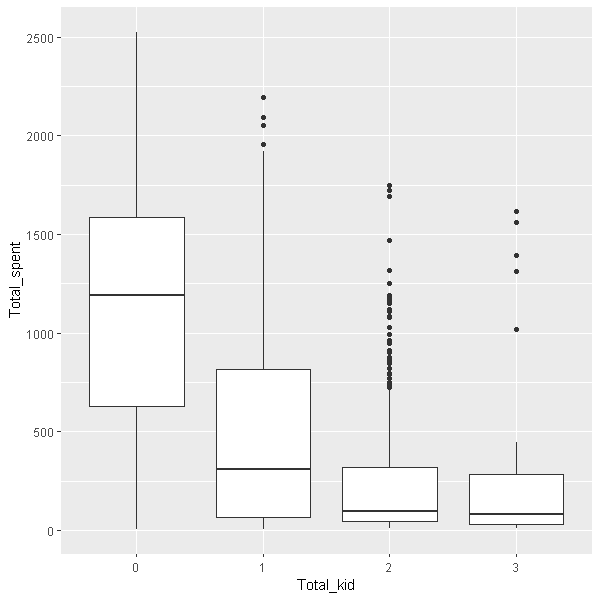

In [18]:
#Kids VS. Total 
ggplot(df1, aes(Total_kid, Total_spent))+
    geom_boxplot()

Through the boxplot we can know that in general the more kid one owns the less they spend. The difference in spending is more drastic 

### Income

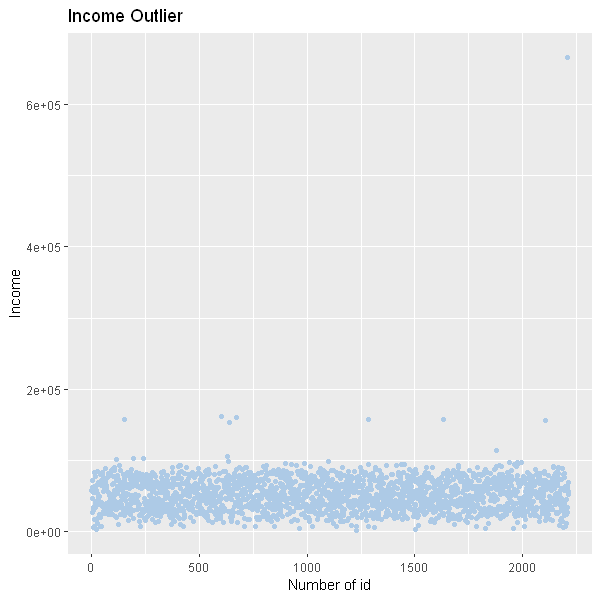

In [19]:
#Income outlier
ggplot(df1, aes(1:length(ID), Income))+
    geom_point(color='#adcae6')+
    labs(x='Number of id', y='Income', title='Income Outlier')

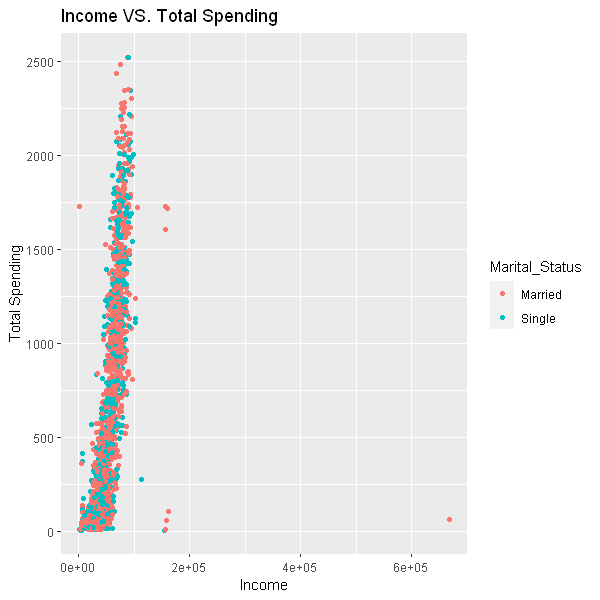

In [20]:
#Income VS. Total spending 
ggplot(df1, aes(Income, Total_spent, color=Marital_Status))+
    geom_point()+
    labs(x='Income', y='Total Spending', title='Income VS. Total Spending')

## Products

### Wine

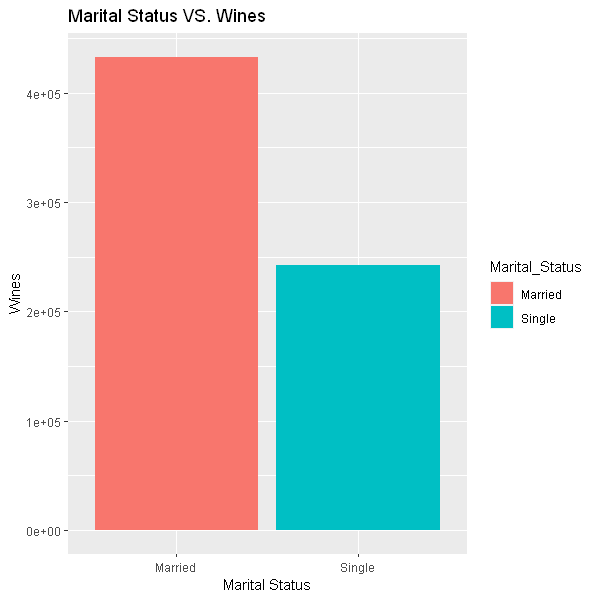

In [21]:
#Martial Status VS. Wines
ggplot(df1, aes(x=Marital_Status, y=MntWines, fill=Marital_Status))+
    geom_bar(stat='identity')+
    ggtitle('Marital Status VS. Wines')+
    xlab('Marital Status')+
    ylab('Wines')

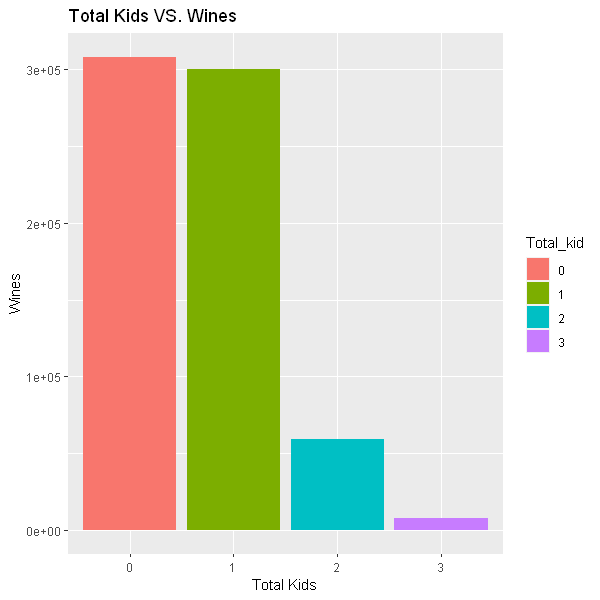

In [22]:
#Total Kids VS. Wines
ggplot(df1, aes(x=Total_kid, y=MntWines, fill=Total_kid))+
    geom_bar(stat='identity')+
    ggtitle('Total Kids VS. Wines')+
    xlab('Total Kids')+
    ylab('Wines')

### Sweet Product

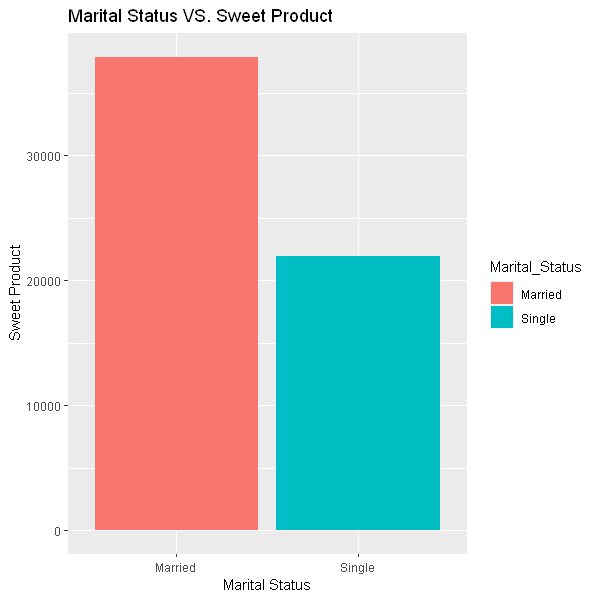

In [23]:
#Martial Status VS. Sweet Product
ggplot(df1, aes(x=Marital_Status, y=MntSweetProducts, fill=Marital_Status))+
    geom_bar(stat='identity')+
    ggtitle('Marital Status VS. Sweet Product')+
    xlab('Marital Status')+
    ylab('Sweet Product')

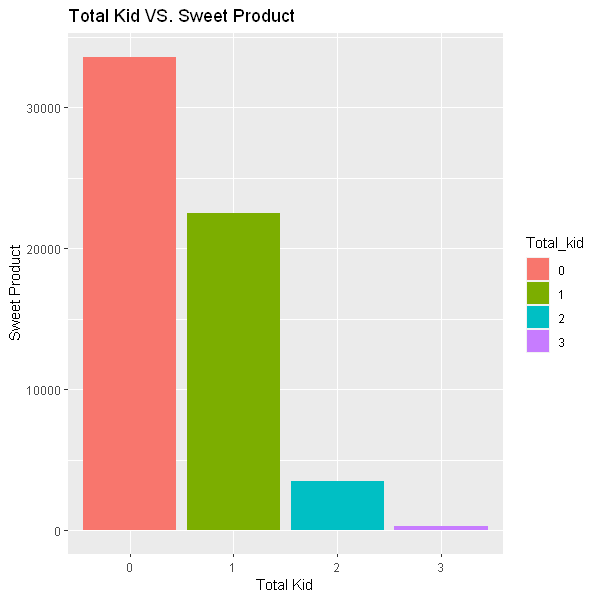

In [24]:
#MTotal Kid VS. Sweet Product
ggplot(df1, aes(x=Total_kid, y=MntSweetProducts, fill=Total_kid))+
    geom_bar(stat='identity')+
    ggtitle('Total Kid VS. Sweet Product')+
    xlab('Total Kid')+
    ylab('Sweet Product')

### Product Correlation

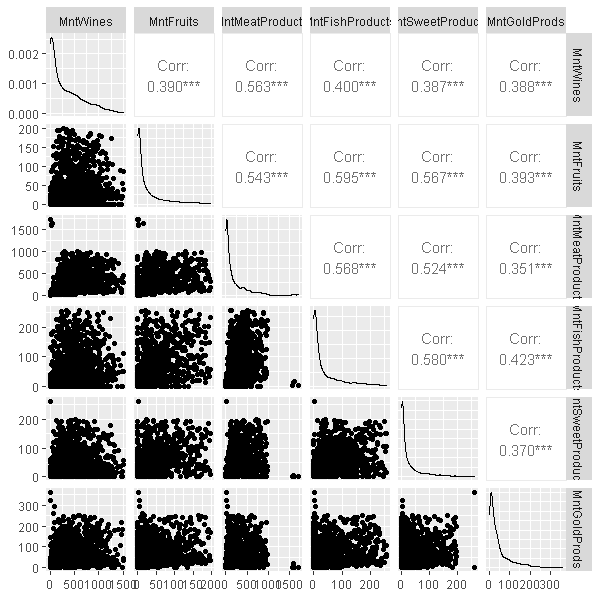

In [25]:
df_products = df[c('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')]
ggpairs(df_products)

## K means clustering

In [26]:
colnames(df1)

[1] "ID"                  "Year_Birth"          "Education"          
 [4] "Marital_Status"      "Income"              "Kidhome"            
 [7] "Teenhome"            "Dt_Customer"         "Recency"            
[10] "MntWines"            "MntFruits"           "MntMeatProducts"    
[13] "MntFishProducts"     "MntSweetProducts"    "MntGoldProds"       
[16] "NumDealsPurchases"   "NumWebPurchases"     "NumCatalogPurchases"
[19] "NumStorePurchases"   "NumWebVisitsMonth"   "AcceptedCmp3"       
[22] "AcceptedCmp4"        "AcceptedCmp5"        "AcceptedCmp1"       
[25] "AcceptedCmp2"        "Complain"            "Z_CostContact"      
[28] "Z_Revenue"           "Response"            "Total_spent"        
[31] "Age"                 "Total_kid"

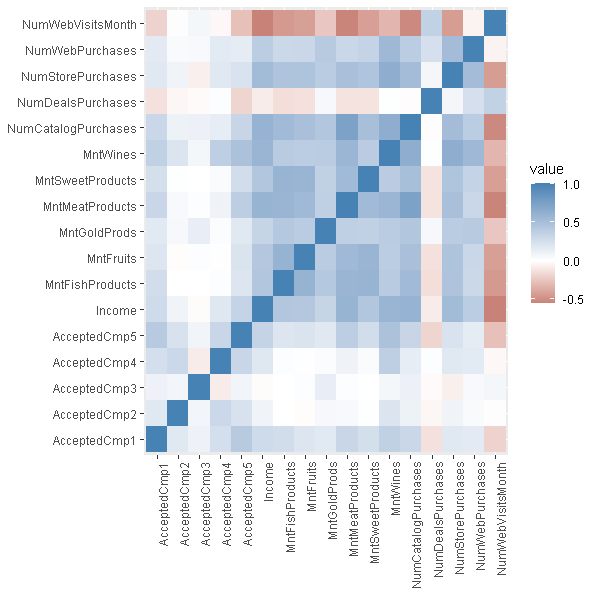

In [27]:
#remove unnecessary data
df2 <- select_if(df1[c(5, 10:25)], is.numeric)

#correlation map
melt(cor(df2))%>%
  ggplot(aes(X1, X2, fill=value))+
  geom_tile()+
  scale_fill_gradient2(low = "firebrick4", high = "steelblue") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 1),
        axis.title = element_blank())

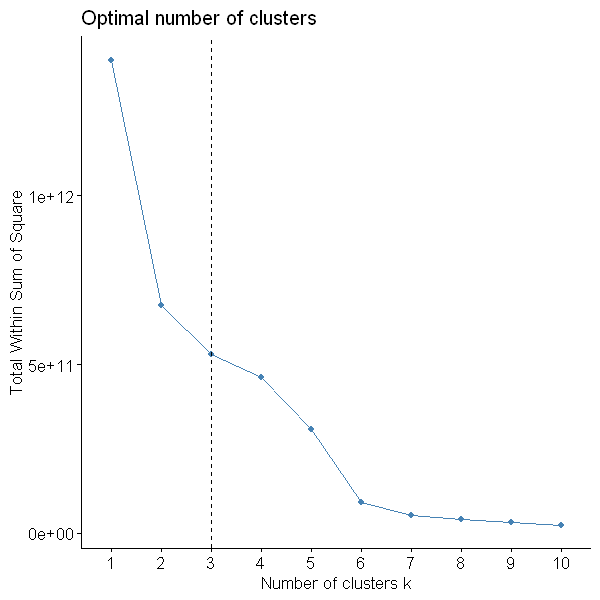

In [119]:
#find oprimal cluster
fviz_nbclust(df2, kmeans, method = "wss")+
    geom_vline(xintercept = 3, linetype = 2)

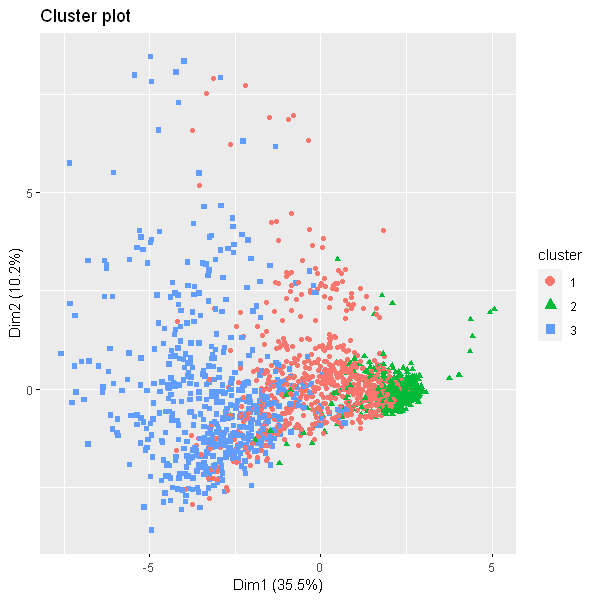

In [113]:
#cluster plot
k_model <- kmeans(df2, 3, nstart = 100)
fviz_cluster(k_model, data = df2, geom = c("point"), ellipse.type="ellipse")

In [114]:
#size of each group
k_model$size

[1] 828 786 599

In [115]:
df.c<-df1%>%
  mutate(cluster = k_model$cluster)

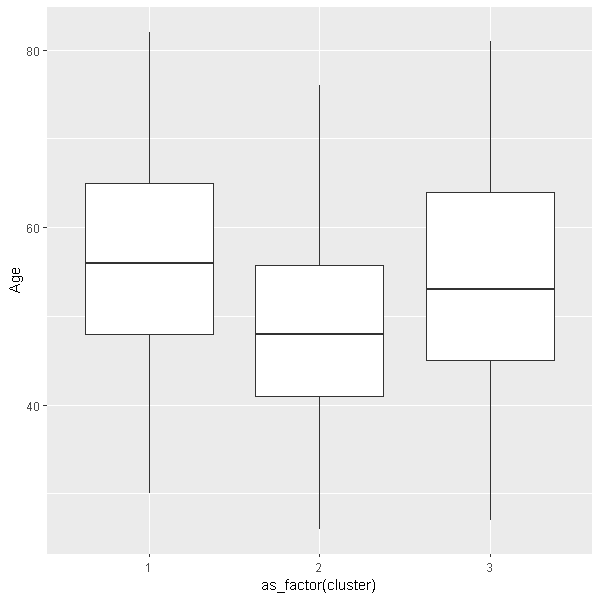

In [116]:
#Age in each cluster
df.c%>%
  ggplot(aes(x=as_factor(cluster), y=Age))+
  geom_boxplot()

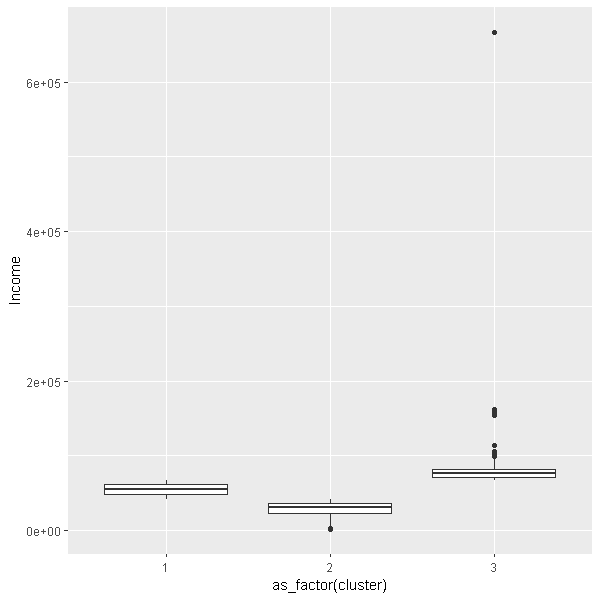

In [117]:
#Income cluster
df.c%>%
    ggplot(aes(x=as_factor(cluster), y=Income))+
    geom_boxplot()

Group 3 has the highest income, Group 2 least.

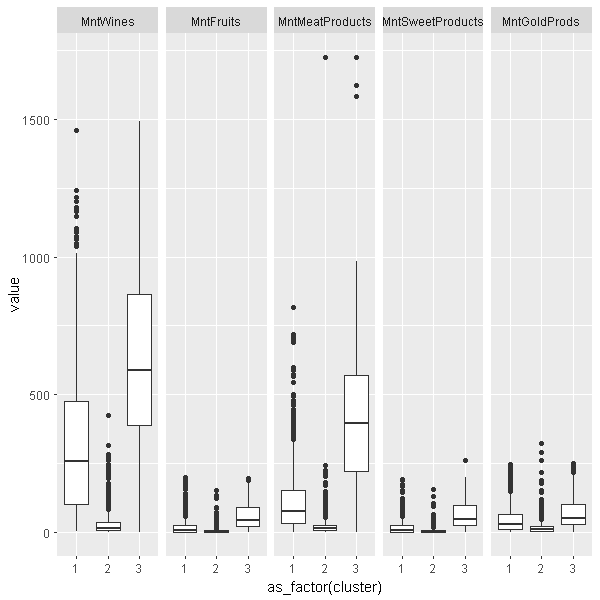

In [120]:
#Product cluster
df.c%>%
  select(cluster, MntWines, MntFruits, MntMeatProducts, MntSweetProducts, MntGoldProds)%>%
  melt(id='cluster')%>%
  ggplot(aes(x=as_factor(cluster), y=value))+
  geom_boxplot()+
  facet_wrap(~variable, ncol=5)

Fruit, Sweet and Gold products are least goods to buy. 

Group 3 purchased most overall.

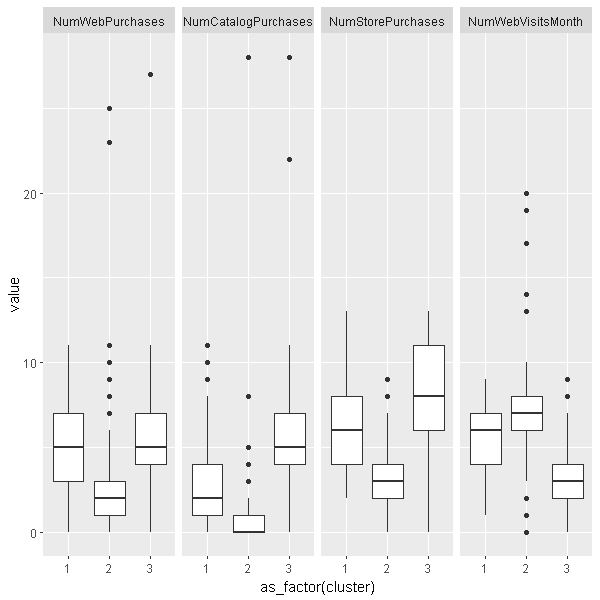

In [122]:
#Channels cluster
df.c%>%
  select(cluster, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth)%>%
  melt(id='cluster')%>%
  ggplot(aes(x=as_factor(cluster), y=value))+
  geom_boxplot()+
  facet_wrap(~variable, ncol=4)

While Group 2 makes the most visit to the company's website, they tend to buy less from the website compare to the other groups. It is also the group that has a very low purchase through catalogue.

Group 3 purchase the most directly from the store and through a catalogue. 

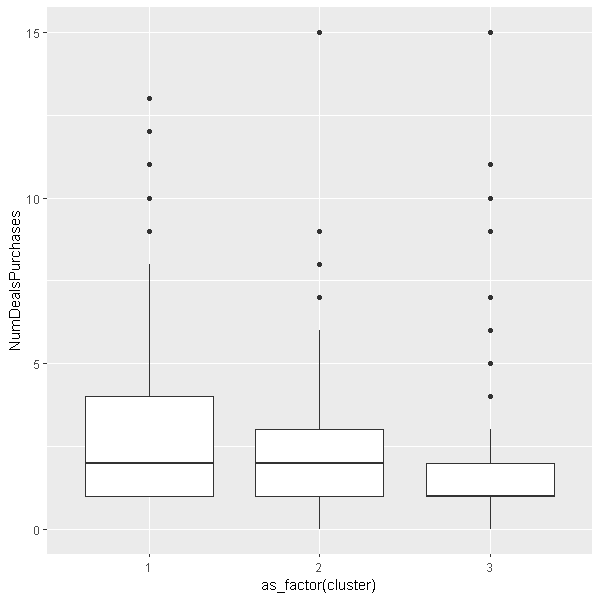

In [125]:
#Purchase made with discount
df.c%>%
  ggplot(aes(x=as_factor(cluster), y=NumDealsPurchases))+
  geom_boxplot()

Group 1 relatively seem to make more purchase when their is a discount deal, whereas Group 3 purchase the least.

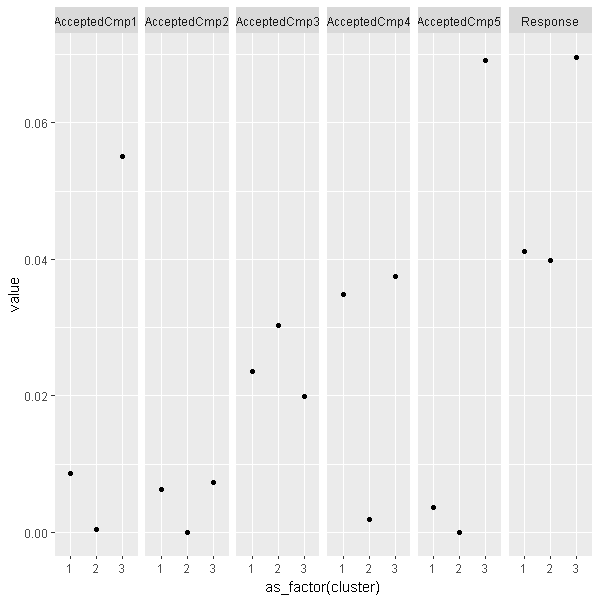

In [126]:
#Campaign cluster
df.camp<-df.c%>%
  group_by(cluster)%>%
  summarise(
    AcceptedCmp1=sum(AcceptedCmp1),
    AcceptedCmp2=sum(AcceptedCmp2),
    AcceptedCmp3=sum(AcceptedCmp3),
    AcceptedCmp4=sum(AcceptedCmp4),
    AcceptedCmp5=sum(AcceptedCmp5),
    Response=sum(Response)
  )%>%
  mutate(
    num = sum(k_model$size),
    AcceptedCmp1=AcceptedCmp1/num,
    AcceptedCmp2=AcceptedCmp2/num,
    AcceptedCmp3=AcceptedCmp3/num,
    AcceptedCmp4=AcceptedCmp4/num,
    AcceptedCmp5=AcceptedCmp5/num,
    Response=Response/num
      )%>%
  select(!num)

#melt wasn't working so an additional step of changing it to a dataframe was added
df.camp <- as.data.frame(df.camp)

df.camp%>%
  melt(id='cluster')%>%
  ggplot(aes(x=as_factor(cluster), y=value))+
  geom_point()+
  facet_wrap(~variable, ncol=6)

Cmp1, Cmp2, Cmp4 and Cmp5 performs tha best to Group 3.

Cmp3 performs the best for Group 2. 

Its clear that campaign works best for Group 3 and least for Group 2, overall.

## Group Features
**Group 1 :** 
* the age is relatively high
* income lower
* discount deals tend to be effective

**Group 2 :**
* lowest income
* less purchase power 
* makes most visit to the website
* campaigns aren't effective for them except for Cmp 3

**Group 3 :**
* highest income
* highest purchase power
* purchases are made directly from store the most 
* visit to website is relatively low 
* campaigns is effective

